## Predicting the Sale Price of Bulldozers (Kaggle Competition)

## 1. Problem Definition

The goal of this project is to predict the sale price of bulldozers at auction.  
Predictions are based on usage, equipment type, and configuaration.  
The data is sourced from auction result postings.  
Type of machine learning problem: **supervised learning / time series regression**

## 2. Evaluation

The competition evaluation metric was *root mean squared log error (RMSLE)*.  
**Project goal:** To minimize the difference between actual and predicted prices, i.e., to minimize RMSLE.

## 3. Data

Data is downloaded from the *Bluebook for Bulldozers* past Kaggle competition:  
[Bluebook for Bulldozers Kaggle Competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview)  
There are three main datasets:  
* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012.  
The score on this set was used to create the public leaderboard.
* **Test.csv** is the test set, which contains data from May 1, 2012 - November 30, 2012.  
The score on this set determined the final rank for the competition.

## 4. Data Features

Kaggle provided a data dictiorany for these datasets.  
See `data-dictionary.xlsx` in the project folder.

#### Importing the tools

In [1]:
### importing external libraries
import numpy
from pandas import read_csv, DataFrame
from matplotlib import pyplot
from matplotlib.figure import Figure
import sklearn

#### Importing data

**Parsing dates**

Working with time series data requires date/time information to be in python datetime format for easy processing.  
Date/time columns are parsed into datetime format using the `parse_dates=` parameter of `read_csv()`.

In [2]:
### importing bulldozer dataset from file
bulldozer_df: DataFrame = read_csv(
    filepath_or_buffer="../Large-Files/data-train-valid.csv",
    parse_dates=["saledate"],
    low_memory=False)

#### Verifying and preparing dataframe

In [3]:
### displaying dataframe info
bulldozer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
### checking for missing values
bulldozer_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

**Sorting dataframe by date**

When working with time series, it is better to sort data by date/time.

In [9]:
### sorting dataframe by sale date
bulldozer_sorted: DataFrame = bulldozer_df.sort_values(by="saledate", ascending=True)
bulldozer_sorted.head(20)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Enriching dataframe with date information**

Using the `pandas.dt` toolbox, all sorts of information can be extracted from datetime values.

In [10]:
### creating various subdate columns
bulldozer_sorted["saleYear"] = bulldozer_sorted["saledate"].dt.year
bulldozer_sorted["saleMonth"] = bulldozer_sorted["saledate"].dt.month
bulldozer_sorted["saleDay"] = bulldozer_sorted["saledate"].dt.day
bulldozer_sorted["saleDayOfWeek"] = bulldozer_sorted["saledate"].dt.day_of_week
bulldozer_sorted["saleDayOfYear"] = bulldozer_sorted["saledate"].dt.day_of_year
bulldozer_sorted.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


#### Exploring the target variable

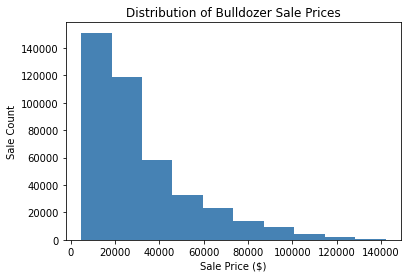

In [7]:
### plotting the distribution of target variable
bulldozer_sorted["SalePrice"].plot.hist(color="steelblue")

### customizing the plot
pyplot.title(label="Distribution of Bulldozer Sale Prices")
pyplot.ylabel(ylabel="Sale Count")
pyplot.xlabel(xlabel="Sale Price ($)");

#### Exploring feature: Sale date

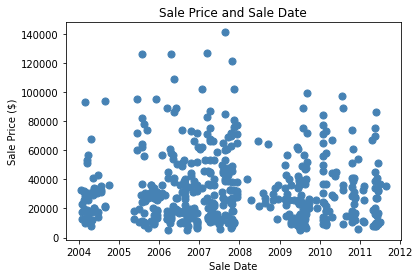

In [8]:
### plotting correlation between sale price and sale date
bulldozer_df[:500].plot.scatter(y="SalePrice", x="saledate", c="steelblue", s=50)

### customizing the plot
pyplot.title(label="Sale Price and Sale Date")
pyplot.ylabel(ylabel="Sale Price ($)")
pyplot.xlabel(xlabel="Sale Date");

#### Exploring feature: State of sale

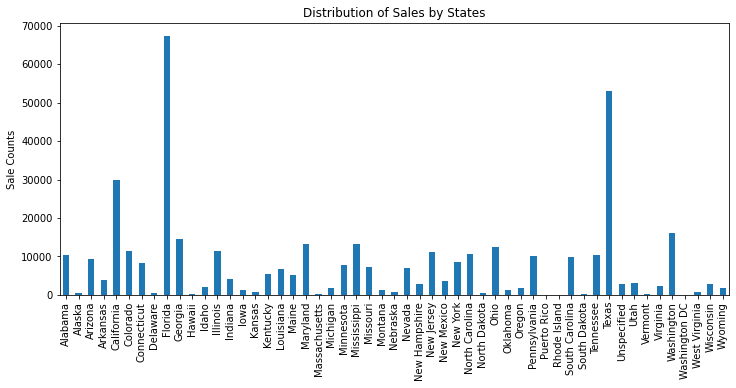

In [22]:
### plotting the distribution of sales by state
bulldozer_sorted["state"].value_counts().sort_index(ascending=True).plot.bar(figsize=(12,5))

### customizing the plot
pyplot.title(label="Distribution of Sales by States")
pyplot.ylabel(ylabel="Sale Counts");